## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

# Махнач Федор, ИАД 3

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
# Пропущенных значений нет.
X.isnull().sum().sum()

0

In [4]:
# Категориальных признаков нет - все имеют тип float.
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# np.random.seed() фиксировать не обязательно, есть random_state.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
X_train.shape, X_test.shape

((124, 13), (54, 13))

In [8]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
138,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0
104,12.51,1.73,1.98,20.5,85.0,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672.0
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0
36,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880.0
93,12.29,2.83,2.22,18.0,88.0,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290.0


In [9]:
X_test.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
19,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0
45,14.21,4.04,2.44,18.9,111.0,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080.0
140,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600.0
30,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0
67,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0


**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [11]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train[['alcohol', 'magnesium']])
X_test_norm = normalizer.fit_transform(X_test[['alcohol', 'magnesium']])
result = pd.DataFrame(columns=['NN', 'Train', 'Test'])

ns = (1, 3, 5, 10, 15, 25)
classifiers = []

for i, n in enumerate(ns):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train_norm, y_train)
    classifiers.append(clf)
    y_train_accuracy = accuracy_score(y_train, clf.predict(X_train_norm))
    y_test_accuracy = accuracy_score(y_test, clf.predict(X_test_norm))
    result.loc[i] = [n, y_train_accuracy, y_test_accuracy]
result

,NN,Train,Test
0,1.0,0.991935,0.722222
1,3.0,0.838710,0.740741
2,5.0,0.806452,0.740741
3,10.0,0.806452,0.777778
4,15.0,0.782258,0.777778
5,25.0,0.725806,0.722222


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [12]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

In [13]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

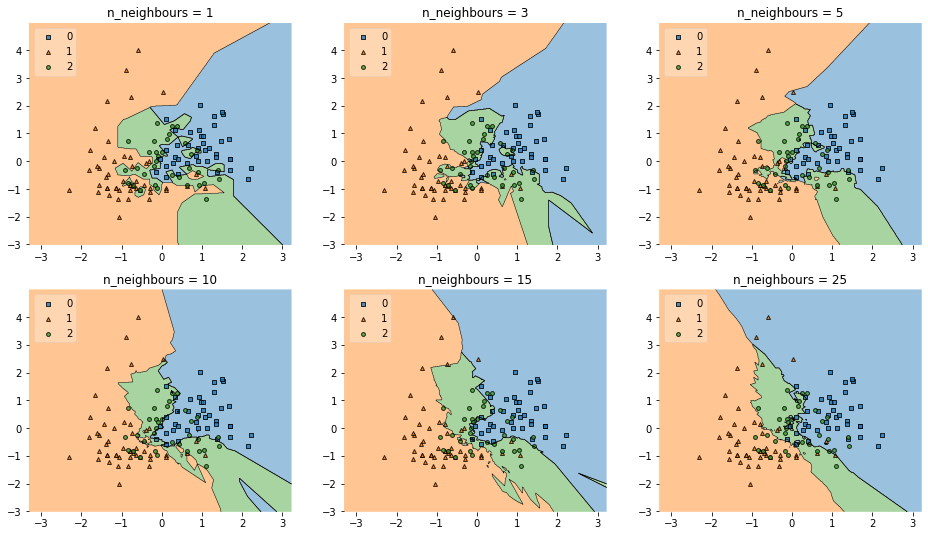

In [14]:
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(16,9))

X_array = np.array(X_train_norm)
y_array = np.array(y_train)
for n, clf, grd in zip(ns, classifiers, itertools.product([0, 1, 2], repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_array, y=y_array, clf=clf, legend=2, scatter_kwargs={'s':15})
    plt.title(f'n_neighbours = {n}')
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

## Комментарий

Опираясь на табличку из 1.3 можно сказать, что наиболее оптимально на тестовой выборке ведут себя k=10 и k=15, а k=10 к тому же показывает более хороший результат на обучающей выборке.

Из графиков решающих поверхностей самыми правдоподобными мне кажутся случаи k=5 и k=10: для меньших k графики более "точечные", для больших k, как мне кажется, зелёные (2) точки учитываются не совсем корректно.

Я бы остановился на k где-то от 5 до 10. Если нужно точное значение из приведённых вариантов, то наверное k=10.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

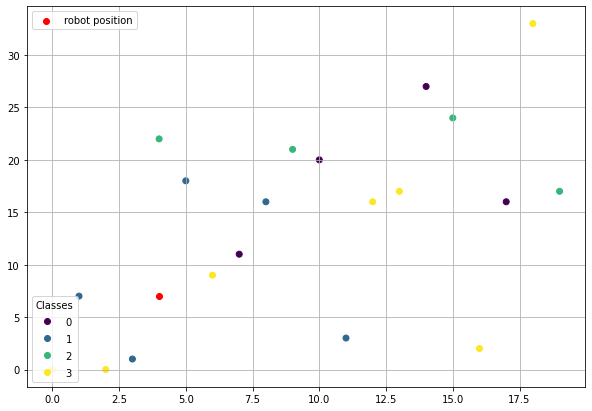

In [15]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = [initial_position]
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k)
        self.knn.fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        # Двигаемся вправо по умолчанию.
        move = 0
        if np.random.binomial(1, 0.8) == 1:
            move = self.knn.predict(self.trajectory[-1].reshape(1, -1))[0]
        self.trajectory.append(self.trajectory[-1] + self.mapping[move])

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [18]:
def conduct_experiment(ax,
                       x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20]),
                       axpos = (0, 0)):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = np.array(robot.trajectory).reshape(-1, 2)
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    ax.grid()
    ax.legend()
    plt.plot()

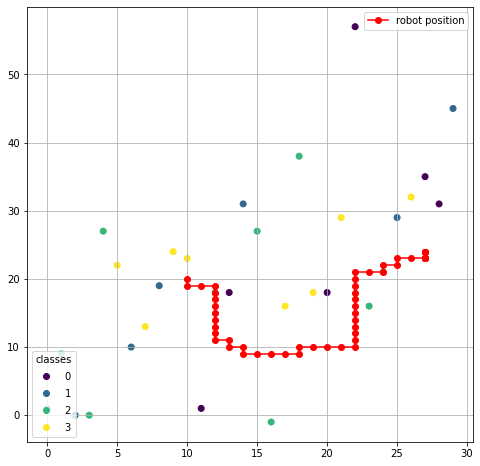

In [19]:
fig, ax = plt.subplots(figsize = (8, 8))

x = np.arange(30)
conduct_experiment(ax, x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

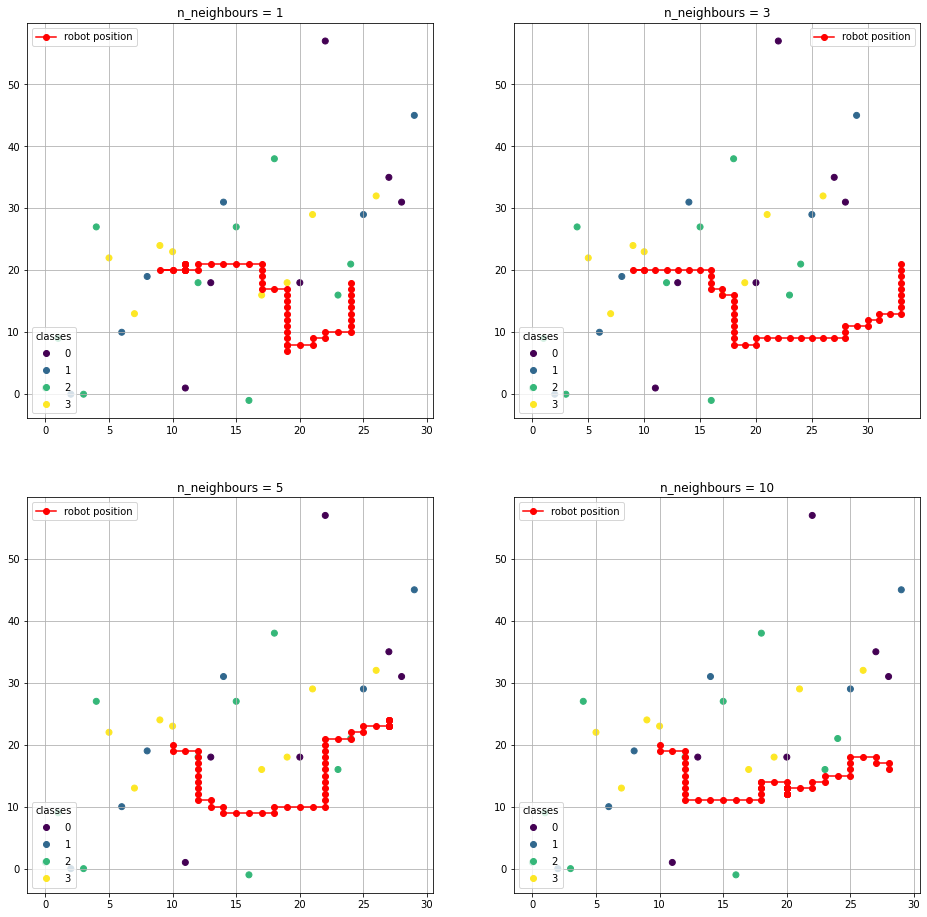

In [20]:
fig, ax = plt.subplots(2, 2, figsize = (16, 16))
for k, axpos in zip((1, 3, 5, 10), itertools.product([0, 1], repeat=2)):
    conduct_experiment(ax[axpos], x, mean = 3, std = 10, k = k, n_movements = 50)
    ax[axpos].set_title(f'n_neighbours = {k}')

## Ответы

Как число соседей влияет на траекторию -- напрямую. Можно заметить, что для этих четырёх случаев траектории довольно сильно отличаются. Однако с другой стороны, в общем-то робот движется в одну сторону и конечные точки траекторий довольно близки.

Если бы классы назначались осмысленно, можно было бы почти детерминированно (С вероятностью 0.2 робот всё же пойдёт вправо) задать движение робота при данном k. Более того, траектория робота могла бы меняться от одного лишь изменения параметра k.

Всё равно не понимаю глубинного смысла в этом.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [21]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [22]:
# Пропущенных значений нет.
data.isnull().sum().sum()

0

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [23]:
# Первый столбец видимо бессмысленный.
data.head(15)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [24]:
del data['Unnamed: 0']
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [25]:
# Больше всего коррелируют вес и размеры камня.
data.corrwith(data['price'])

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
dtype: float64

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [26]:
data_encoded = pd.get_dummies(data, columns=['cut', 'color', 'clarity'])
data_encoded

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [27]:
X = data_encoded.loc[:, data_encoded.columns != 'price']
y = data_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [28]:
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame

scaler = StandardScaler()
numeric = ['carat', 'depth', 'table', 'x', 'y', 'z']
scaler.fit(X_train[numeric])
X_train[numeric] = scaler.transform(X_train[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

<ipython-input-28-61920f03d62b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numeric] = scaler.transform(X_train[numeric])
C:\Users\Fedor\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-28-61920f03d62b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [29]:
X_train

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
19497,0.862659,-0.311437,-0.207099,1.055581,0.986556,0.968253,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
31229,-1.029889,0.178549,-0.656213,-1.207734,-1.202544,-1.168276,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
22311,0.862659,0.458541,-0.207099,0.904099,0.951670,0.982309,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
278,0.021527,0.598537,-1.105327,0.164512,0.192898,0.251391,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6646,-0.020530,-0.031445,-0.656213,0.182333,0.184176,0.181110,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.526206,0.458541,0.691128,0.663511,0.672581,0.715243,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
44732,-0.693436,-0.521432,-1.105327,-0.628540,-0.635646,-0.676312,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
38158,-0.987832,-1.011418,0.242014,-1.109717,-1.115329,-1.182333,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
860,0.210782,0.738533,0.691128,0.351636,0.253949,0.391952,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
train_pred = reg.predict(X_train)
test_pred = reg.predict(X_test)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

In [31]:
train_mse

1290541.9147450617

In [32]:
test_mse

1244765.43571587

**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [33]:
print(*zip(X.columns, reg.coef_), sep='\n')

('carat', 5338.615670614774)
('depth', -90.17381703342062)
('table', -60.33227991027282)
('x', -1100.418850039304)
('y', -6.458916720534148)
('z', -34.25894462088502)
('cut_Fair', -592.5577321439531)
('cut_Good', 2.9633479820914133)
('cut_Ideal', 253.63852540503453)
('cut_Premium', 185.21223061120665)
('cut_Very Good', 150.74362814562042)
('color_D', 835.3145532451168)
('color_E', 618.2855855078151)
('color_F', 562.0105774046061)
('color_G', 335.1543150682228)
('color_H', -163.32011592605033)
('color_I', -640.7696800750834)
('color_J', -1546.6752352246278)
('clarity_I1', -3889.6097650896704)
('clarity_IF', 1569.427534666555)
('clarity_SI1', -137.9000938309352)
('clarity_SI2', -1107.6692169508403)
('clarity_VS1', 768.224541988134)
('clarity_VS2', 447.11581788825765)
('clarity_VVS1', 1211.7254159815457)
('clarity_VVS2', 1138.6857653469538)


## Ответ
Среди вещественных переменных на порядок выделяются carat и x.

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [34]:
from sklearn.linear_model import Lasso, Ridge

In [35]:
clf = Lasso(alpha=10)
clf.fit(X_train, y_train)
print(*clf.coef_, sep='\n')

4853.407399085518
-100.4651420932841
-80.37216497862737
-696.7943266526185
-0.0
-32.599936706460866
-443.36703065622993
-32.472339597944476
83.50657024588745
0.0
0.0
350.3617796247847
176.45265678326157
131.48716612945347
0.0
-433.4287096462851
-846.5779632467381
-1649.8444835259122
-3635.7458999353153
725.3863050590156
-617.7687744411312
-1525.2646902425765
160.05675048102864
-24.57321520204664
538.3343048357449
512.2200091267646


In [36]:
clf = Ridge(alpha=10)
clf.fit(X_train, y_train)
print(*clf.coef_, sep='\n')

5298.926724172016
-88.82284574169113
-60.80455015803503
-1058.7451214936893
-9.051730531375831
-37.405247895796705
-594.9432247452929
3.0086488666632865
254.5020036805955
185.25061329849092
152.18195891253043
830.3984688027919
614.5758811252374
558.3875484570485
333.49690860826314
-163.364513861094
-637.5182485850851
-1535.9760446197984
-3815.493747970896
1549.2430323551116
-146.0881536415209
-1111.4476318517436
757.9570504258311
438.4201519528805
1199.6435608545337
1127.7657377304276


## Ответ
Lasso и Ridge почти не уменьшили разброс весов. 

Видимо, проблема мультиколлинеарности проявлялась в изначальной регрессии слишком сильно (??)

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

C:\Users\Fedor\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75483763.6902008, tolerance: 60605526.52466703
  model = cd_fast.enet_coordinate_descent(


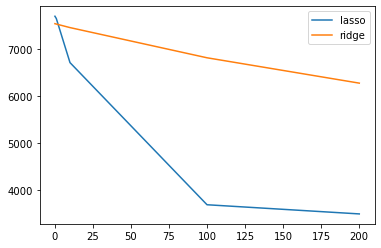

In [37]:
alpha = [0.1, 1, 10, 100, 200]
lasso, ridge = [], []

for a in alpha:
    clf_lasso = Lasso(alpha=a)
    clf_lasso.fit(X_train, y_train)
    lasso.append(np.linalg.norm(clf_lasso.coef_))
    
    clf_ridge = Ridge(alpha=a)
    clf_ridge.fit(X_train, y_train)
    ridge.append(np.linalg.norm(clf_ridge.coef_))
    
plt.plot(alpha, lasso, label='lasso')
plt.plot(alpha, ridge, label='ridge')
plt.legend()

## Вывод
Lasso метод более агрессивно уменьшает веса. Видимо именно поэтому Lasso-регрессию используют чаще, чем Ridge.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [38]:
from sklearn.linear_model import LassoCV

reg = LassoCV(cv=5, alphas=[0.1, 0.3, 0.5, 0.8, 1, 5, 10, 50, 100, 200]).fit(X_train, y_train)

reg.alphas_, reg.mse_path_

C:\Users\Fedor\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255841121.1928177, tolerance: 48476565.46527789
  model = cd_fast.enet_coordinate_descent_gram(


(array([2.e+02, 1.e+02, 5.e+01, 1.e+01, 5.e+00, 1.e+00, 8.e-01, 5.e-01,
        3.e-01, 1.e-01]),
 array([[2534744.23552396, 2481568.40319477, 2460482.19916137,
         2383135.00341129, 2412550.60475102],
        [2333105.88226834, 2275033.8776573 , 2272061.29469769,
         2182156.64825798, 2207551.9194746 ],
        [1988779.18713119, 1911167.15412163, 1946919.16213953,
         1822833.2912399 , 1857283.15950274],
        [1378716.75335167, 1339109.563544  , 1360616.23154897,
         1285213.17524909, 1289404.64442254],
        [1347001.29986546, 1307244.84741896, 1338218.90527137,
         1262803.67369629, 1258991.86729584],
        [1334932.19850303, 1294494.14106987, 1335457.19894229,
         1258208.37346937, 1246601.42236872],
        [1334645.75705166, 1294177.6494294 , 1335677.57288758,
         1258296.09880072, 1246272.23757805],
        [1334274.25300894, 1293731.16292476, 1336072.91711791,
         1258484.90826013, 1245824.45316188],
        [1334065.08960837, 129

In [39]:
best_alpha_id = reg.mse_path_.mean(axis=1).argmin()
best_alpha = reg.alphas_[best_alpha_id]
best_alpha

0.5

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [40]:
clf_lasso = Lasso(alpha=best_alpha)
clf_lasso.fit(X_train, y_train)
print(*zip(X.columns, clf_lasso.coef_), sep='\n')

('carat', 5314.329866943081)
('depth', -90.68647685760193)
('table', -61.26784301656541)
('x', -1081.023994902701)
('y', -4.972058561226147)
('z', -34.446747801554544)
('cut_Fair', -728.9485594154646)
('cut_Good', -142.74553666910936)
('cut_Ideal', 101.28203113427602)
('cut_Premium', 31.355064621361848)
('cut_Very Good', 0.0)
('color_D', 493.1169645688296)
('color_E', 278.1617727241981)
('color_F', 222.4098543968603)
('color_G', 0.0)
('color_H', -494.9121575610634)
('color_I', -969.1960729764216)
('color_J', -1869.9954673366742)
('clarity_I1', -4398.162167194595)
('clarity_IF', 1005.9531754866621)
('clarity_SI1', -683.262846931126)
('clarity_SI2', -1649.8893527189525)
('clarity_VS1', 216.5241112809505)
('clarity_VS2', -97.77569190577832)
('clarity_VVS1', 656.7346619390969)
('clarity_VVS2', 586.0102212063294)


## Выводы
Признаки color, cut, clarity достаточно информативные и объяснимые с точки зрения обыденной логики. Также очень выделяется признак carat - на порядок больше остальных, его значимость тоже объяснима.

Очень странно, что длина (x) бриллианта входит со значительным отрицательным коэффициентом (возможно, причина в значимости признака carat). При этом y, z слабо влияют на результат.

depth и table не слишком информативные.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [41]:
pred = clf_lasso.predict(X_test)
mean_squared_error(y_test, pred)

1244374.6785048489

In [42]:
test_mse

1244765.43571587

## Выводы
Lasso-регрессия дала немного лучший результат, поэтому её лучше использовать для предсказаний. Но вообще говоря разница не ахти какая. Видимо, Lasso-регрессия даёт лучший результат, так как учитывает мультиколлинеарность признаков размера и веса.

Вообще у меня стойкое ощущение, что я что-то сделал не так и лассо должно было показать себя гораздо лучше, но хз.